#**<font color = "darkorange">Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - Group 60</font>**

##**<font color = "mediumblue"> Group Members: </font>**

*Deniz Atalay*

*Nazlıcan Turan*

*Göktuğ Gençkaya*


##<font color = "mediumseagreen">**Introduction**</font>
---
<font color="indigo">

Audio streaming and media services provider Spotify is founded in 2006 by Daniel Ek. It became one of the world's most popular and largest music streaming service providers with over 345 million monthly active users and 155 million paying subscribers (December 2020)
</font>
<font color="indigo">

  Offering digital copyright restricted recorded music and podcasts, Spotify includes more than 70 million songs, from record labels and media companies. Users can search for music based on artist, album, or genre, and can create, edit, and share playlists.
</font>
<font color="indigo">


In this project, using the dataset from Kaggle (https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks),  we run some data analysis algorithms, seeing how the musics in Spotify vary with respect to their popularities, instrumentalness, danceability etc.
</font>


### <font color="crimson"> Utilized Datasets </font>

<font color="indigo">
We aren't using additional datasets.
</font>

### <font color="crimson"> Opening and Preprocessing Data </font>
 ---
 <font color = "indigo">
 In the opening and preprocessing part of the project, we accessed the data csv files through Drive. Since the real data from these csv files is dirty data which means that they contain NA values in some rows of some categories, we handled this problem by getting rid of all NA information.
 </font>

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn import datasets
from os.path import join
from scipy.stats import f_oneway
spotify_df = pd.read_csv("/content/data.csv")
genres_df = pd.read_csv("/content/data_by_genres.csv")
w_genres_df = pd.read_csv("/content/data_w_genres.csv")
year_df = pd.read_csv("/content/data_by_year.csv")
artist_df = pd.read_csv("/content/data_by_artist.csv")
df_main = pd.DataFrame(spotify_df)
df_genres = pd.DataFrame(genres_df)
df_year = pd.DataFrame(year_df)
df_artist = pd.DataFrame(artist_df)
df_w_genres = pd.DataFrame(w_genres_df)

In [ ]:
df_main.dropna()
df_genres.dropna()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,zim urban groove,0.003910,0.553000,4.267200e+04,0.942000,0.961000,0.113000,-8.004000,0.039900,134.995000,0.752000,9.000000,7,1
3228,zolo,0.208648,0.533837,2.641016e+05,0.620470,0.163334,0.201430,-10.878906,0.061828,126.765194,0.576721,31.108254,9,1
3229,zouk,0.272928,0.641889,4.416418e+05,0.695778,0.257604,0.166011,-9.518889,0.050511,105.848889,0.878444,32.555556,7,1
3230,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,0


## <font color = "mediumseagreen">**Exploratory Data Analysis**</font>

---
<font color = "indigo">
We seperated the exploration of data part to 4 different sections: Visualizations of Descriptive Statistics, Visualizations of Aggregated Forms Based on Features, Analysis of Most Popular Artists and Songs, How Songs of Different Genres Change Over Time.
</font>



### <font color = "crimson">*Visualizations Descriptive Statistics*</font>

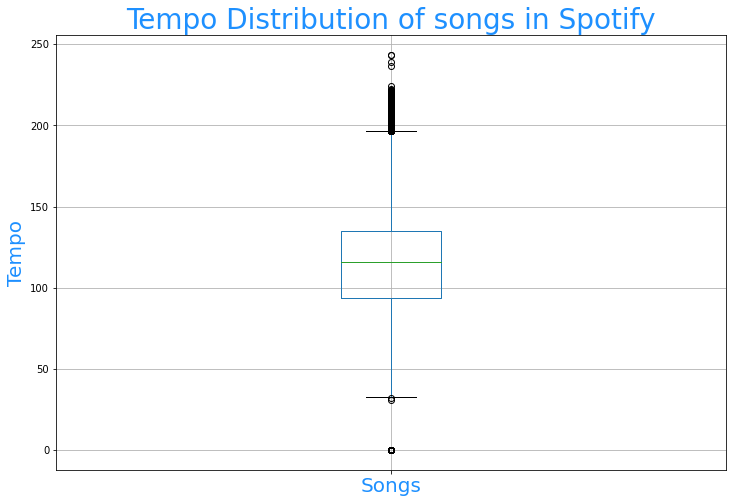

mean =  117.0064997964312


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
boxplot = df_main.boxplot(column=["tempo"])
ylocs = np.linspace(0, max(df_main["tempo"]))
plt.title("Tempo Distribution of songs in Spotify",size=28,color="dodgerblue")
plt.ylabel("Tempo",size=20,color="dodgerblue")
plt.xticks([1],["Songs"],size=20,color="dodgerblue")
plt.show()
x=df_main["tempo"].mean(axis = 0)
print("mean = ",x)

<font color = "indigo">
Here is a box plot which describes the overall tempo distribution of songs in the dataset with a mean of 117.0064997964312.
</font>

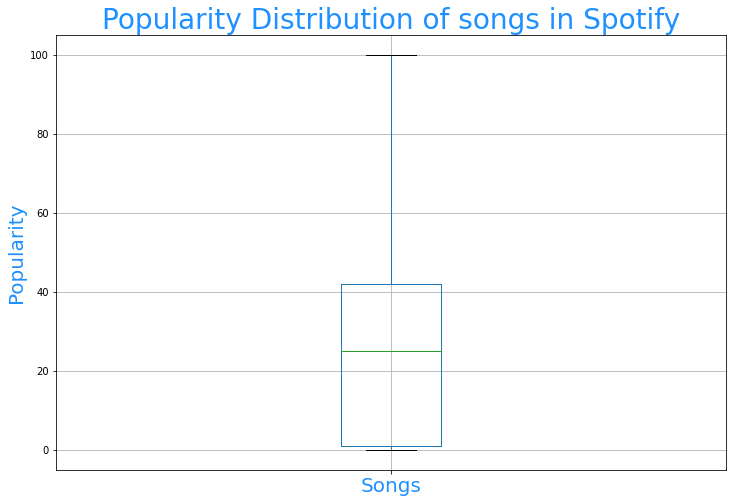

25.693380889849703


In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
boxplot = df_main.boxplot(column=["popularity"])
ylocs = np.linspace(0, max(df_main["popularity"]))
plt.title("Popularity Distribution of songs in Spotify",size=28,color="dodgerblue")
plt.ylabel("Popularity",size=20,color="dodgerblue")
plt.xticks([1],["Songs"],size=20,color="dodgerblue")
plt.show()
x=df_main["popularity"].mean(axis = 0)
print(x)

<font color = "indigo">
This box plot which shows the overall popularity distribution of songs in the dataset with a mean of 25.693380889849703.
</font>

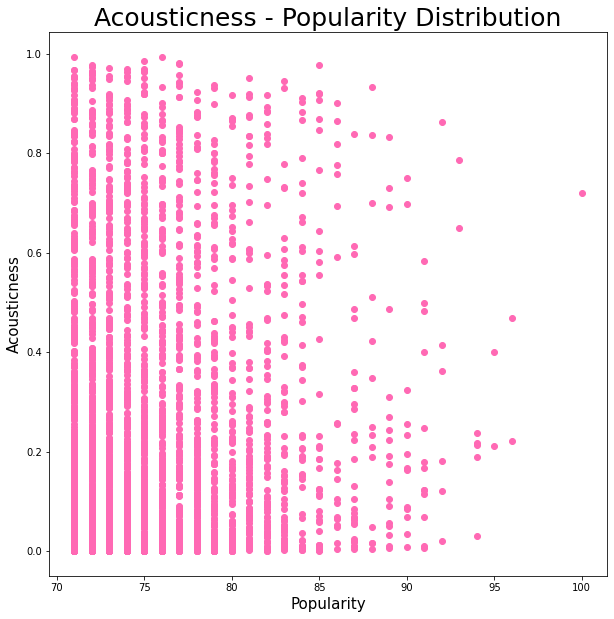

In [ ]:
fig = plt.figure(figsize = (10,10))

popular = df_main[df_main["popularity"]>70]
plt.scatter(popular["popularity"], popular["acousticness"],color='hotpink')
plt.title("Acousticness - Popularity Distribution", size=25)
plt.ylabel("Acousticness",size=15)
plt.xlabel("Popularity",size=15)
plt.show()


<font color = "indigo">
This scatterplot demonstrates that acousticness decreases when popularity increases. We can see this difference more clearly when we set data to show the popularity up to 70.

</font>



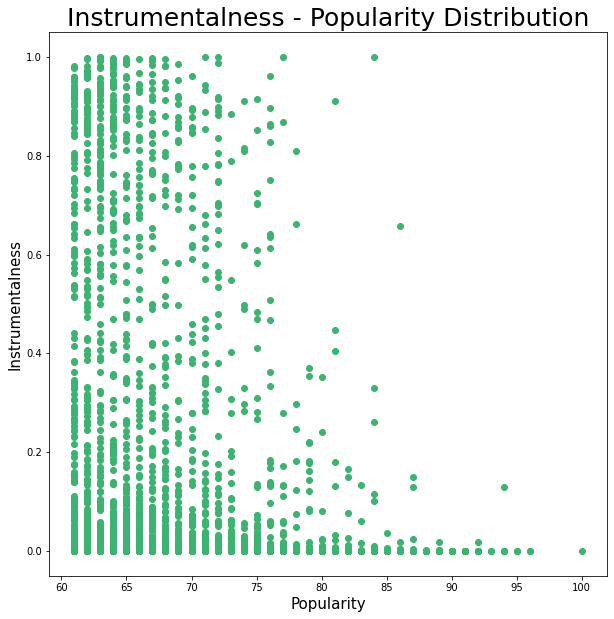

In [ ]:
fig = plt.figure(figsize = (10,10))

popular = df_main[df_main["popularity"] > 60]
plt.scatter(popular["popularity"], popular["instrumentalness"],color='mediumseagreen')
plt.title("Instrumentalness - Popularity Distribution", size=25)
plt.ylabel("Instrumentalness",size=15)
plt.xlabel("Popularity",size=15)
plt.show()

<font color = "indigo">
In this scatterplot, the relationship between popularity and instrumentalness is observable. Data density in the left side of the graph shows that increase in instrumentalness result in a lower popularity.

</font>

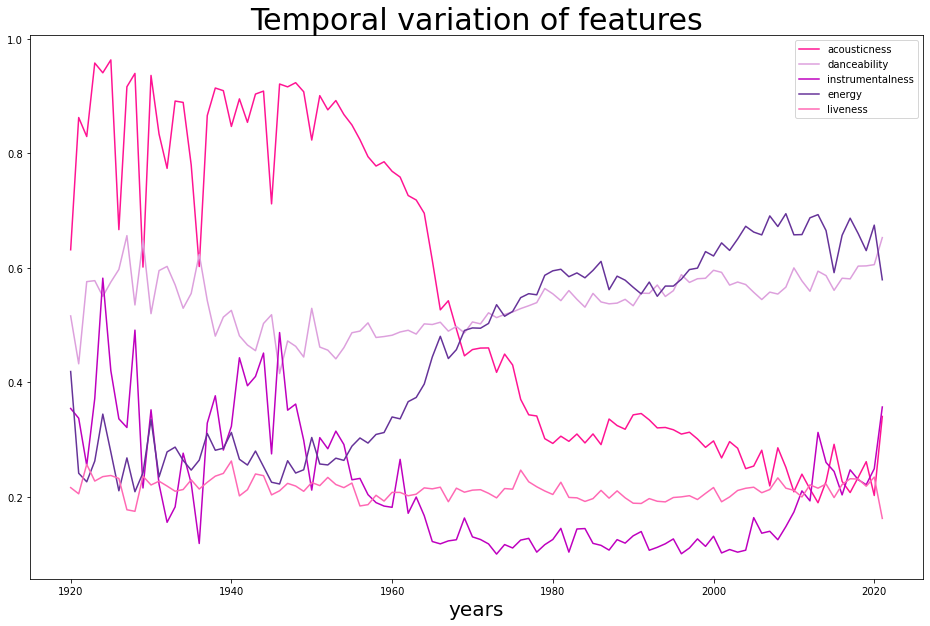

In [ ]:
fig = plt.figure(figsize=(16,10))
plt.plot(df_year["year"], df_year["acousticness"], color="deeppink", label="acousticness")
plt.plot(df_year["year"], df_year["danceability"], color="plum", label="danceability")
plt.plot(df_year["year"], df_year["instrumentalness"], color="m", label="instrumentalness")
plt.plot(df_year["year"], df_year["energy"], color="rebeccapurple", label="energy")
plt.plot(df_year["year"], df_year["liveness"], color="hotpink", label="liveness")
plt.title("Temporal variation of features",size=30)
plt.xlabel("years",size=20)
plt.legend()
plt.show()

<font color = "indigo">
This graph shows the variation of song features such as acousticness, danceability, instrumentalness, energy and liveness with respect to song's years, each represented in a different color. After 50s, a drastic decrease in the acousticness of songs and also a significant decrease in the instrumentalness of the songs are observed. However, there's a drastic increase in the energy of the songs and a slight increase in danceability after 60s. In addition, liveness doesn't show a significant change over time.
</font>

### <font color = "crimson">*Visualizations of Aggregated Forms Based on Features*</font>###

<font color = "indigo">
As a group, we first collected smaller subgroups of the genres under main group since in the dataset there is too many genres that can be collected under a more general genre. For example '21st Century Classical' can be grouped as classical, acid techno can be grouped as techno. By doing this, we visualised and compared the distribution of different features such as danceability, loudness, popularity and acousticness with respected to different generalised genres.

</font>

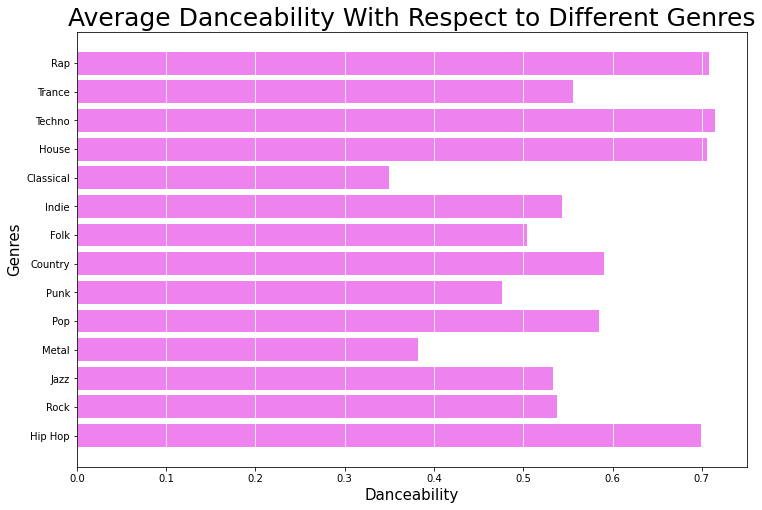

In [ ]:
rock_counter = 0
rock_popularity= 0
rock_danceability= 0
rock_loud=0
rock_ac=0
jazz_counter = 0
jazz_popularity= 0
jazz_danceability = 0
jazz_loud=0
jazz_ac=0
metal_counter = 0
metal_popularity= 0
metal_danceability = 0
metal_loud=0
metal_ac=0
pop_counter = 0
pop_popularity= 0
pop_danceability = 0
pop_loud=0
pop_ac=0
punk_counter = 0
punk_popularity= 0
punk_danceability = 0
punk_loud=0
punk_ac=0
country_counter = 0
country_popularity= 0
country_danceability = 0
country_loud=0
country_ac=0
folk_counter = 0
folk_popularity= 0
folk_danceability = 0
folk_loud=0
folk_ac=0
indie_counter = 0
indie_popularity= 0
indie_danceability = 0
indie_loud=0
indie_ac=0
classical_counter = 0
classical_popularity= 0
classical_danceability = 0
classical_loud=0
classical_ac=0
house_counter = 0
house_popularity= 0
house_danceability = 0
house_loud=0
house_ac=0
techno_counter = 0
techno_popularity= 0
techno_danceability = 0
techno_loud=0
techno_ac=0
trance_counter = 0
trance_popularity= 0
trance_danceability = 0
trance_loud=0
trance_ac=0
hiphop_counter = 0
hiphop_popularity= 0
hiphop_danceability = 0
hiphop_loud=0
hiphop_ac=0
rap_counter = 0
rap_popularity= 0
rap_danceability = 0
rap_loud=0
rap_ac=0
pattern = r"[a-zA-Z0-9]+"
word_list = {}
for i in range(len(df_genres)):
  words = re.findall(pattern, df_genres.iloc[i].genres)
  dance= float(df_genres.iloc[i]["danceability"])
  pop= float(df_genres.iloc[i]["popularity"])
  loud= float(df_genres.iloc[i]["loudness"])
  ac= float(df_genres.iloc[i]["acousticness"])
  if "hip" in words and "hop" in words:
    hiphop_counter += 1
    hiphop_danceability += dance
    hiphop_popularity+= pop
    hiphop_loud+= loud
    hiphop_ac+=ac
  for word in words:
    if word == 'rock':
      rock_counter += 1
      rock_danceability += dance
      rock_popularity+= pop
      rock_loud+= loud
      rock_ac+=ac
    elif word == 'jazz':
      jazz_counter += 1
      jazz_danceability += dance
      jazz_popularity+= pop
      jazz_loud+= loud
      jazz_ac+=ac
    elif word == 'metal':
      metal_counter += 1
      metal_danceability += dance
      metal_popularity+= pop
      metal_loud+= loud
      metal_ac+=ac
    elif word == 'pop':
      pop_counter += 1
      pop_danceability += dance
      pop_popularity+= pop
      pop_loud+= loud
      pop_ac+=ac
    elif word == 'punk':
      punk_counter += 1
      punk_danceability += dance
      punk_popularity+= pop
      punk_loud+= loud
      punk_ac+=ac
    elif word == 'country':
      country_counter += 1
      country_danceability += dance
      country_popularity+= pop
      country_loud+= loud
      country_ac+=ac
    elif word == 'folk':
      folk_counter += 1
      folk_danceability += dance
      folk_popularity+= pop
      folk_loud+= loud
      folk_ac+=ac
    elif word == 'indie':
      indie_counter += 1
      indie_danceability += dance
      indie_popularity+= pop
      indie_loud+= loud
      indie_ac+=ac
    elif word == 'classical':
      classical_counter += 1
      classical_danceability += dance
      classical_popularity+= pop
      classical_loud+= loud
      classical_ac+=ac
    elif word == 'house':
      house_counter += 1
      house_danceability += dance
      house_popularity+= pop
      house_loud+= loud
      house_ac+=ac
    elif word == 'techno':
      techno_counter += 1
      techno_danceability += dance
      techno_popularity+= pop
      techno_loud+= loud
      techno_ac+=ac
    elif word == 'trance':
      trance_counter += 1
      trance_danceability += dance
      trance_popularity+= pop
      trance_loud+= loud
      trance_ac+=ac
    elif word == 'rap':
      rap_counter += 1
      rap_danceability += dance
      rap_popularity+= pop
      rap_loud+= loud
      rap_ac+=ac

rock_danceability = rock_danceability / rock_counter
jazz_danceability = jazz_danceability / jazz_counter
metal_danceability = metal_danceability / metal_counter
pop_danceability = pop_danceability / pop_counter
punk_danceability = punk_danceability / punk_counter
country_danceability = country_danceability / country_counter
folk_danceability = folk_danceability / folk_counter
indie_danceability = indie_danceability / indie_counter
classical_danceability = classical_danceability / classical_counter
house_danceability = house_danceability / house_counter
techno_danceability = techno_danceability / techno_counter
trance_danceability = trance_danceability / trance_counter
hiphop_danceability = hiphop_danceability / hiphop_counter
rap_danceability = rap_danceability / rap_counter

rock_popularity = rock_popularity / rock_counter
jazz_popularity = jazz_popularity / jazz_counter
metal_popularity = metal_popularity / metal_counter
pop_popularity = pop_popularity/ pop_counter
punk_popularity = punk_popularity / punk_counter
country_popularity = country_popularity / country_counter
folk_popularity = folk_popularity / folk_counter
indie_popularity = indie_popularity/ indie_counter
classical_popularity = classical_popularity / classical_counter
house_popularity = house_popularity / house_counter
techno_popularity = techno_popularity / techno_counter
trance_popularity = trance_popularity / trance_counter
hiphop_popularity = hiphop_popularity / hiphop_counter
rap_popularity = rap_popularity / rap_counter

rock_loud = rock_loud/ rock_counter
jazz_loud = jazz_loud / jazz_counter
metal_loud = metal_loud/ metal_counter
pop_loud = pop_loud/ pop_counter
punk_loud = punk_loud / punk_counter
country_loud = country_loud / country_counter
folk_loud = folk_loud / folk_counter
indie_loud = indie_loud/ indie_counter
classical_loud = classical_loud / classical_counter
house_loud = house_loud / house_counter
techno_loud = techno_loud / techno_counter
trance_loud = trance_loud / trance_counter
hiphop_loud = hiphop_loud / hiphop_counter
rap_loud = rap_loud / rap_counter

rock_ac = rock_ac/ rock_counter
jazz_ac = jazz_ac / jazz_counter
metal_ac= metal_ac/ metal_counter
pop_ac = pop_ac/ pop_counter
punk_ac = punk_ac / punk_counter
country_ac = country_ac / country_counter
folk_ac = folk_ac / folk_counter
indie_ac = indie_ac/ indie_counter
classical_ac = classical_ac / classical_counter
house_ac = house_ac / house_counter
techno_ac = techno_ac / techno_counter
trance_ac = trance_ac/ trance_counter
hiphop_ac = hiphop_ac / hiphop_counter
rap_ac = rap_ac / rap_counter
list1 = []
list2 = []
list1.append("Hip Hop")
list1.append("Rock")
list1.append("Jazz")
list1.append("Metal")
list1.append("Pop")
list1.append("Punk")
list1.append("Country")
list1.append("Folk")
list1.append("Indie")
list1.append("Classical")
list1.append("House")
list1.append("Techno")
list1.append("Trance")
list1.append("Rap")
list2.append(hiphop_danceability)
list2.append(rock_danceability)
list2.append(jazz_danceability)
list2.append(metal_danceability)
list2.append(pop_danceability)
list2.append(punk_danceability)
list2.append(country_danceability)
list2.append(folk_danceability)
list2.append(indie_danceability)
list2.append(classical_danceability)
list2.append(house_danceability)
list2.append(techno_danceability)
list2.append(trance_danceability)
list2.append(rap_danceability)

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list2, height = 0.8,color="violet")
ax.set_title("Average Danceability With Respect to Different Genres", size = 25)
ax.set_xlabel("Danceability", size = 15)
ax.set_ylabel("Genres", size = 15)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

<font color = "indigo">
Techno is the genre with the highest danceability, followed by rap, house and hip hop respectively whereas classical and metal are the genres with least danceabilities.

</font>


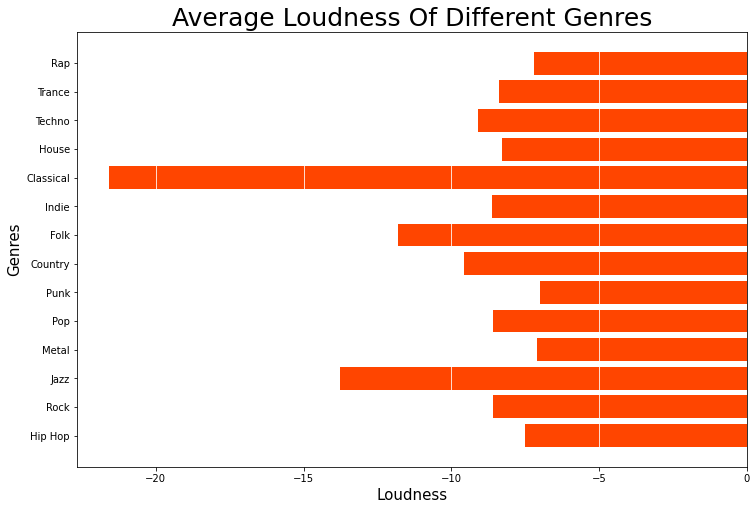

In [ ]:
list3 = []
list3.append(hiphop_loud)
list3.append(rock_loud)
list3.append(jazz_loud)
list3.append(metal_loud)
list3.append(pop_loud)
list3.append(punk_loud)
list3.append(country_loud)
list3.append(folk_loud)
list3.append(indie_loud)
list3.append(classical_loud)
list3.append(house_loud)
list3.append(techno_loud)
list3.append(trance_loud)
list3.append(rap_loud)

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list3, height = 0.8,color="orangered")
ax.set_title("Average Loudness Of Different Genres", size = 25)
ax.set_xlabel("Loudness", size = 15)
ax.set_ylabel("Genres", size = 15)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

<font color = "indigo">
Classical is by far the least loud genre since loudness is represented with a negative numerical value, followed by jazz and folk. However, punk is the loudest genre followed by hiphop, metal and rap.

</font>

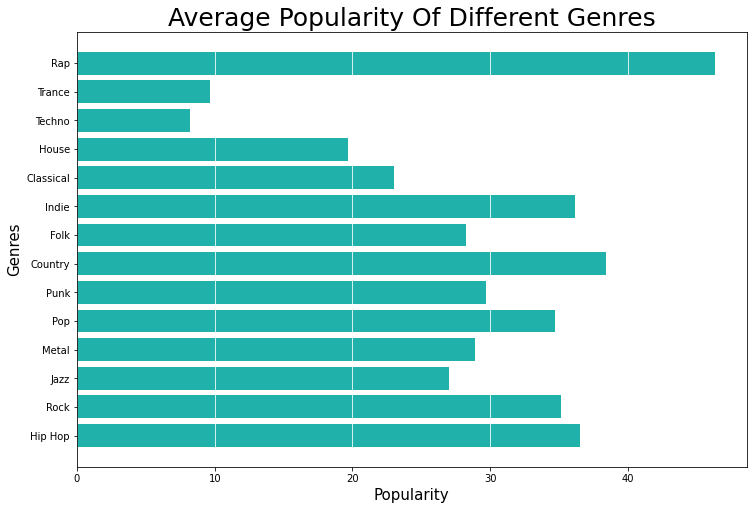

In [ ]:
list4 = []
list4.append(hiphop_popularity)
list4.append(rock_popularity)
list4.append(jazz_popularity)
list4.append(metal_popularity)
list4.append(pop_popularity)
list4.append(punk_popularity)
list4.append(country_popularity)
list4.append(folk_popularity)
list4.append(indie_popularity)
list4.append(classical_popularity)
list4.append(house_popularity)
list4.append(techno_popularity)
list4.append(trance_popularity)
list4.append(rap_popularity)

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list4, height = 0.8,color="lightseagreen")
ax.set_title("Average Popularity Of Different Genres", size = 25)
ax.set_ylabel("Genres", size = 15)
ax.set_xlabel("Popularity", size = 15)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

<font color = "indigo">
Rap is the most popular genre among the datasets, followed by country, hip hop, indie and rock respectively whereas, techno is the least popular genre followed by trance.

</font>

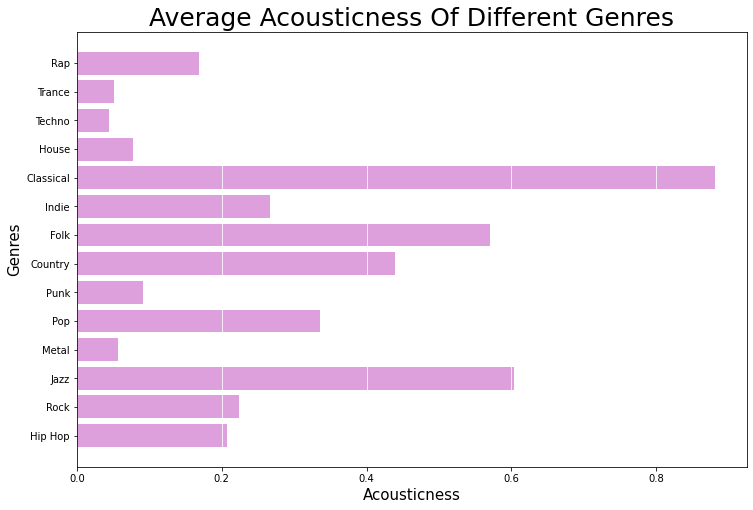

In [ ]:
list5 = []
list5.append(hiphop_ac)
list5.append(rock_ac)
list5.append(jazz_ac)
list5.append(metal_ac)
list5.append(pop_ac)
list5.append(punk_ac)
list5.append(country_ac)
list5.append(folk_ac)
list5.append(indie_ac)
list5.append(classical_ac)
list5.append(house_ac)
list5.append(techno_ac)
list5.append(trance_ac)
list5.append(rap_ac)
fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list5, height = 0.8,color="plum")
ax.set_title("Average Acousticness Of Different Genres", size = 25)
ax.set_xlabel("Acousticness", size = 15)
ax.set_ylabel("Genres", size = 15)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

 <font color = "indigo">
This bar plot shows that classical and jazz and folk are the genres with the most acousticness values. Considering the fact that these genres are not quite popular and have also less danceabilities and less loudness among others, it can be said that
people mostly prefer genres with less acousticness, higher loudness and danceabilities over other genres .

</font>

### <font color = "crimson">*Analysis of the Most Popular Artists and Songs*</font>

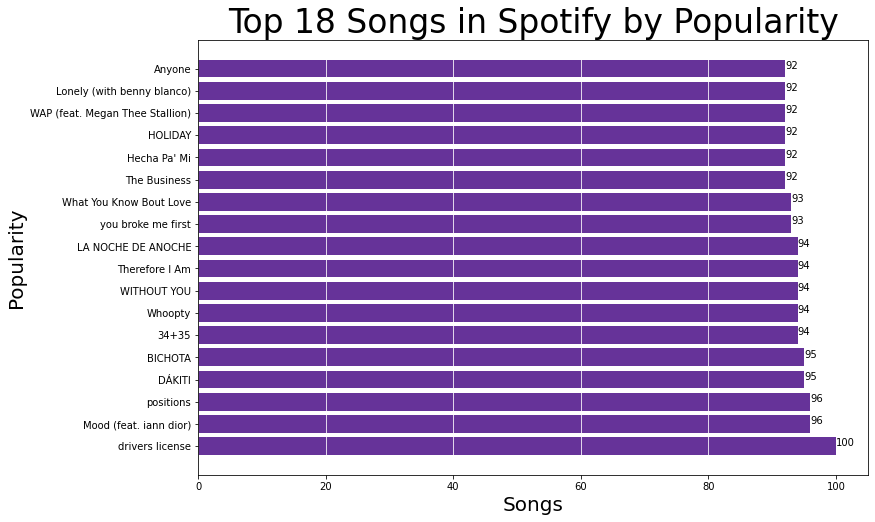

Mean Popularity of top 18 songs on Spotify is 93.88888888888889


In [ ]:
x = df_main.groupby("artists")["popularity"].sum().sort_values(ascending=False)
x.head(20)
fig, ax = plt.subplots(figsize=(12,8))
t=df_main.sort_values(by=["popularity"],ascending=False).nlargest(18,"popularity")
d=dict(zip(t.name,t.popularity))
mylist1=[]
mylist2=[]
for k,v in d.items():
  mylist1.append(k)
  mylist2.append(v)
plt.barh(mylist1,mylist2,color="rebeccapurple")
for index, value in enumerate(mylist2):
    plt.text(value, index, str(round(value,5)))
plt.title('Top 18 Songs in Spotify by Popularity', size=33)
plt.xlabel("Songs",size=20)
plt.ylabel("Popularity",size=20)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()
print("Mean Popularity of top 18 songs on Spotify is " +str(t.popularity.mean()))

<font color = "indigo">
This graph shows the most 18 popular song names in Spotify. It is observed that the song "drivers licence" is the most popular one among the dataset with a given popularity value 100 out of 100, followed by the songs "positions" and "Mood(feat. iann dior)" with popularity values 96. Mean popularity of these 18 songs is 93.88888888888889.
</font>

In [ ]:
top_rated = df_main.nlargest(18, 'popularity')['artists']
contents = []
for content in top_rated:
    contents.append(content)
    print(content)

['Olivia Rodrigo']
['24kGoldn', 'iann dior']
['Ariana Grande']
['Bad Bunny', 'Jhay Cortez']
['KAROL G']
['Ariana Grande']
['CJ']
['The Kid LAROI']
['Billie Eilish']
['Bad Bunny', 'ROSALÍA']
['Pop Smoke']
['Tate McRae']
['Cardi B', 'Megan Thee Stallion']
['Lil Nas X']
['Justin Bieber', 'benny blanco']
['Justin Bieber']
['Tiësto']
['Boza']


<font color = "indigo">
Artists of the most popular 18 songs on the data.csv are shown above. The most popular song "drivers licence" corresponds to the artist Olivia Rodrigo.
</font>








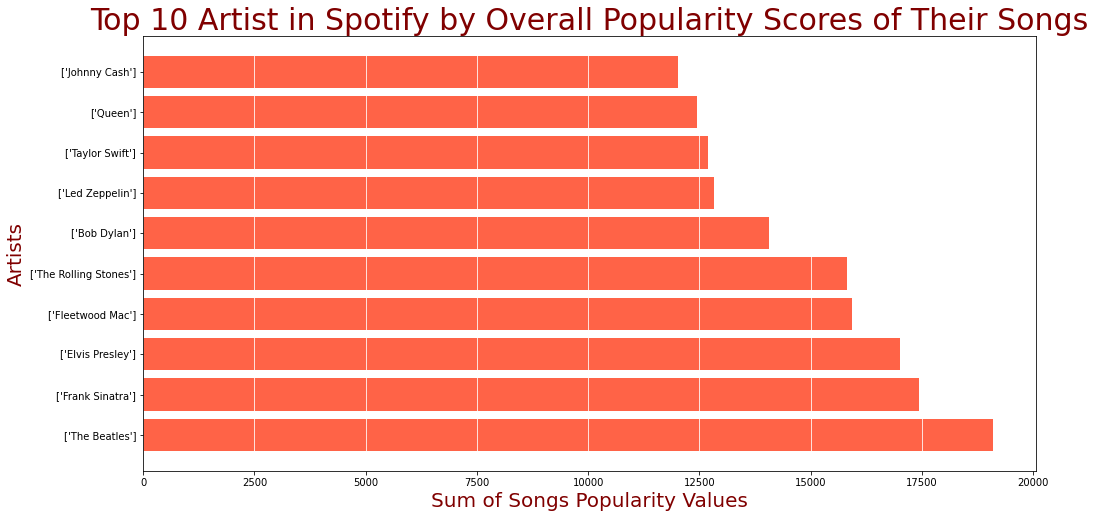

In [ ]:
plt.figure(figsize=(16, 8))
font = {'color':  'maroon'}
x = df_main.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
plt.barh(x.index, x,color="tomato")
plt.title('Top 10 Artist in Spotify by Overall Popularity Scores of Their Songs', size=30, fontdict=font)
plt.ylabel('Artists',size=20, fontdict=font)
plt.xlabel('Sum of Songs Popularity Values',size=20, fontdict=font)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()


<font color = "indigo">
Top 10 artists based on the overall popularity scores obtained by sum of their all songs on the dataset data.csv are shown above. The most popular 3 artists are The Beatles, Frank Sinatra and Elvis Presly.
</font>

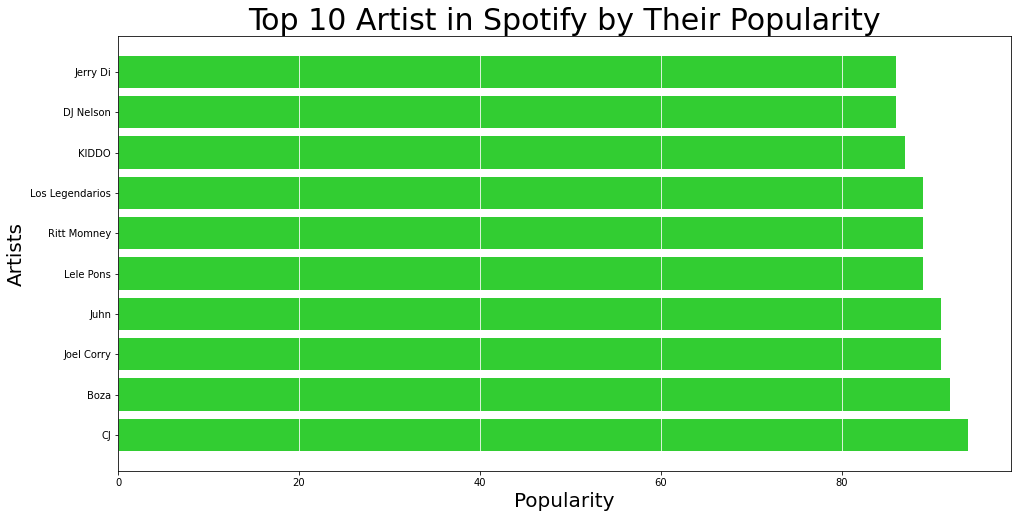

In [ ]:
plt.figure(figsize=(16, 8))
font = {'color':  'black'}
x = df_artist.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10)
plt.barh(x.index, x,color="limegreen")
plt.title('Top 10 Artist in Spotify by Their Popularity', size=30, fontdict=font)
plt.ylabel('Artists',size=20, fontdict=font)
plt.xlabel('Popularity',size=20, fontdict=font)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

<font color = "indigo">
Top 10 artists based on the popularity scores given in data_by_artist.csv are shown above. The most popular artists are Cj, Boza and Juhn according to popularity values assigned to artists by this dataset.


</font>

###<font color = "crimson">*How Songs of Different Genres Change Over Time*</font>

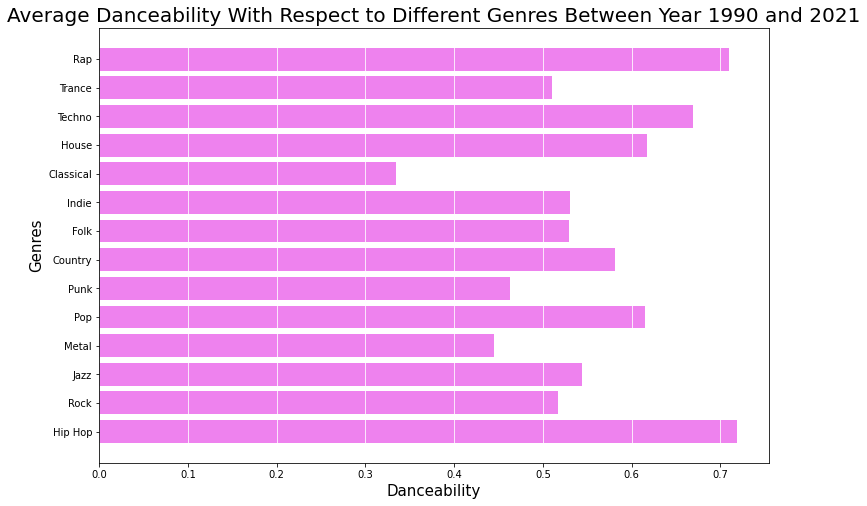

In [ ]:
genre1 = df_w_genres[["artists", "genres"]]
df_main['artists'] = df_main['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df_main_p = df_main
df_main_p = df_main_p.explode("artists")
merged = pd.merge(df_main_p, genre1, on="artists")

twenties = merged[merged["year"] > 1990]
eighties = merged[merged["year"] > 1960]
eighties = eighties[eighties["year"] < 1990]

rock_counter = 0
rock_popularity= 0
rock_danceability= 0
jazz_counter = 0
jazz_popularity= 0
jazz_danceability = 0
metal_counter = 0
metal_popularity= 0
metal_danceability = 0
pop_counter = 0
pop_popularity= 0
pop_danceability = 0
punk_counter = 0
punk_popularity= 0
punk_danceability = 0
country_counter = 0
country_popularity= 0
country_danceability = 0
folk_counter = 0
folk_popularity= 0
folk_danceability = 0
indie_counter = 0
indie_popularity= 0
indie_danceability = 0
classical_counter = 0
classical_popularity= 0
classical_danceability = 0
house_counter = 0
house_popularity= 0
house_danceability = 0
techno_counter = 0
techno_popularity= 0
techno_danceability = 0
trance_counter = 0
trance_popularity= 0
trance_danceability = 0
hiphop_counter = 0
hiphop_popularity= 0
hiphop_danceability = 0
rap_counter = 0
rap_popularity= 0
rap_danceability = 0
metal_loud=0
pop_loud=0
pattern = r"[a-zA-Z0-9]+"
word_list = {}
for i in range(len(twenties)):
  words = re.findall(pattern, twenties.iloc[i].genres)
  dance= float(twenties.iloc[i]["danceability"])
  pop= float(twenties.iloc[i]["popularity"])
  loud= float(twenties.iloc[i]["loudness"])
  ac= float(twenties.iloc[i]["acousticness"])
  if "hip" in words and "hop" in words:
    hiphop_counter += 1
    hiphop_danceability += dance
    hiphop_popularity+= pop
  for word in words:
    if word == 'rock':
      rock_counter += 1
      rock_danceability += dance
      rock_popularity+= pop
    elif word == 'jazz':
      jazz_counter += 1
      jazz_danceability += dance
      jazz_popularity+= pop
    elif word == 'metal':
      metal_counter += 1
      metal_danceability += dance
      metal_popularity+= pop

    elif word == 'pop':
      pop_counter += 1
      pop_danceability += dance
      pop_popularity+= pop
    elif word == 'punk':
      punk_counter += 1
      punk_danceability += dance
      punk_popularity+= pop

    elif word == 'country':
      country_counter += 1
      country_danceability += dance
      country_popularity+= pop
    elif word == 'folk':
      folk_counter += 1
      folk_danceability += dance
      folk_popularity+= pop
    elif word == 'indie':
      indie_counter += 1
      indie_danceability += dance
      indie_popularity+= pop
    elif word == 'classical':
      classical_counter += 1
      classical_danceability += dance
      classical_popularity+= pop
    elif word == 'house':
      house_counter += 1
      house_danceability += dance
      house_popularity+= pop
    elif word == 'techno':
      techno_counter += 1
      techno_danceability += dance
      techno_popularity+= pop
    elif word == 'trance':
      trance_counter += 1
      trance_danceability += dance
      trance_popularity+= pop
    elif word == 'rap':
      rap_counter += 1
      rap_danceability += dance
      rap_popularity+= pop

try:
  rock_danceability = rock_danceability / rock_counter
  jazz_danceability = jazz_danceability / jazz_counter
  metal_danceability = metal_danceability / metal_counter
  pop_danceability = pop_danceability / pop_counter
  punk_danceability = punk_danceability / punk_counter
  country_danceability = country_danceability / country_counter
  folk_danceability = folk_danceability / folk_counter
  indie_danceability = indie_danceability / indie_counter
  classical_danceability = classical_danceability / classical_counter
  house_danceability = house_danceability / house_counter
  techno_danceability = techno_danceability / techno_counter
  trance_danceability = trance_danceability / trance_counter
  hiphop_danceability = hiphop_danceability / hiphop_counter
  rap_danceability = rap_danceability / rap_counter

  rock_popularity = rock_popularity / rock_counter
  jazz_popularity = jazz_popularity / jazz_counter
  metal_popularity = metal_popularity / metal_counter
  pop_popularity = pop_popularity/ pop_counter
  punk_popularity = punk_popularity / punk_counter
  country_popularity = country_popularity / country_counter
  folk_popularity = folk_popularity / folk_counter
  indie_popularity = indie_popularity/ indie_counter
  classical_popularity = classical_popularity / classical_counter
  house_popularity = house_popularity / house_counter
  techno_popularity = techno_popularity / techno_counter
  trance_popularity = trance_popularity / trance_counter
  hiphop_popularity = hiphop_popularity / hiphop_counter
  rap_popularity = rap_popularity / rap_counter

except:
  pass

list1 = []
list2 = []
list1.append("Hip Hop")
list1.append("Rock")
list1.append("Jazz")
list1.append("Metal")
list1.append("Pop")
list1.append("Punk")
list1.append("Country")
list1.append("Folk")
list1.append("Indie")
list1.append("Classical")
list1.append("House")
list1.append("Techno")
list1.append("Trance")
list1.append("Rap")
list2.append(hiphop_danceability)
list2.append(rock_danceability)
list2.append(jazz_danceability)
list2.append(metal_danceability)
list2.append(pop_danceability)
list2.append(punk_danceability)
list2.append(country_danceability)
list2.append(folk_danceability)
list2.append(indie_danceability)
list2.append(classical_danceability)
list2.append(house_danceability)
list2.append(techno_danceability)
list2.append(trance_danceability)
list2.append(rap_danceability)

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list2, height = 0.8,color="violet")
ax.set_title("Average Danceability With Respect to Different Genres Between Year 1990 and 2021", size = 20)
ax.set_xlabel("Danceability", size = 15)
ax.set_ylabel("Genres", size = 15)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

<font color = "indigo">
This graph demonstrates the average danceability among genres between years 1990 and 2021. It's observable that the genre with the most danceability is hiphop.
</font>

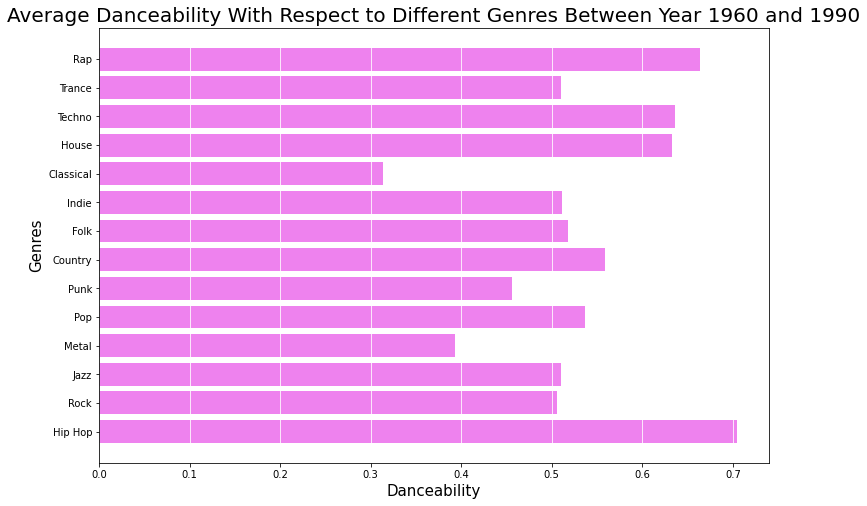

In [ ]:
rock_counter = 0
rock_popularity= 0
rock_danceability= 0
jazz_counter = 0
jazz_popularity= 0
jazz_danceability = 0
metal_counter = 0
metal_popularity= 0
metal_danceability = 0
pop_counter = 0
pop_popularity= 0
pop_danceability = 0
punk_counter = 0
punk_popularity= 0
punk_danceability = 0
country_counter = 0
country_popularity= 0
country_danceability = 0
folk_counter = 0
folk_popularity= 0
folk_danceability = 0
indie_counter = 0
indie_popularity= 0
indie_danceability = 0
classical_counter = 0
classical_popularity= 0
classical_danceability = 0
house_counter = 0
house_popularity= 0
house_danceability = 0
techno_counter = 0
techno_popularity= 0
techno_danceability = 0
trance_counter = 0
trance_popularity= 0
trance_danceability = 0
hiphop_counter = 0
hiphop_popularity= 0
hiphop_danceability = 0
rap_counter = 0
rap_popularity= 0
rap_danceability = 0

pattern = r"[a-zA-Z0-9]+"
word_list = {}

for i in range(len(eighties)):
  words = re.findall(pattern, eighties.iloc[i].genres)
  dance= float(eighties.iloc[i]["danceability"])
  pop= float(eighties.iloc[i]["popularity"])
  loud= float(eighties.iloc[i]["loudness"])
  ac= float(eighties.iloc[i]["acousticness"])
  if "hip" in words and "hop" in words:
    hiphop_counter += 1
    hiphop_danceability += dance
    hiphop_popularity+= pop
  for word in words:
    if word == 'rock':
      rock_counter += 1
      rock_danceability += dance
      rock_popularity+= pop
    elif word == 'jazz':
      jazz_counter += 1
      jazz_danceability += dance
      jazz_popularity+= pop
    elif word == 'metal':
      metal_counter += 1
      metal_danceability += dance
      metal_popularity+= pop
    elif word == 'pop':
      pop_counter += 1
      pop_danceability += dance
      pop_popularity+= pop
    elif word == 'punk':
      punk_counter += 1
      punk_danceability += dance
      punk_popularity+= pop
    elif word == 'country':
      country_counter += 1
      country_danceability += dance
      country_popularity+= pop
    elif word == 'folk':
      folk_counter += 1
      folk_danceability += dance
      folk_popularity+= pop
    elif word == 'indie':
      indie_counter += 1
      indie_danceability += dance
      indie_popularity+= pop
    elif word == 'classical':
      classical_counter += 1
      classical_danceability += dance
      classical_popularity+= pop
    elif word == 'house':
      house_counter += 1
      house_danceability += dance
      house_popularity+= pop
    elif word == 'techno':
      techno_counter += 1
      techno_danceability += dance
      techno_popularity+= pop
    elif word == 'trance':
      trance_counter += 1
      trance_danceability += dance
      trance_popularity+= pop
    elif word == 'rap':
      rap_counter += 1
      rap_danceability += dance
      rap_popularity+= pop

try:
  rock_danceability = rock_danceability / rock_counter
  jazz_danceability = jazz_danceability / jazz_counter
  metal_danceability = metal_danceability / metal_counter
  pop_danceability = pop_danceability / pop_counter
  punk_danceability = punk_danceability / punk_counter
  country_danceability = country_danceability / country_counter
  folk_danceability = folk_danceability / folk_counter
  indie_danceability = indie_danceability / indie_counter
  classical_danceability = classical_danceability / classical_counter
  house_danceability = house_danceability / house_counter
  techno_danceability = techno_danceability / techno_counter
  trance_danceability = trance_danceability / trance_counter
  hiphop_danceability = hiphop_danceability / hiphop_counter
  rap_danceability = rap_danceability / rap_counter

  rock_popularity = rock_popularity / rock_counter
  jazz_popularity = jazz_popularity / jazz_counter
  metal_popularity = metal_popularity / metal_counter
  pop_popularity = pop_popularity/ pop_counter
  punk_popularity = punk_popularity / punk_counter
  country_popularity = country_popularity / country_counter
  folk_popularity = folk_popularity / folk_counter
  indie_popularity = indie_popularity/ indie_counter
  classical_popularity = classical_popularity / classical_counter
  house_popularity = house_popularity / house_counter
  techno_popularity = techno_popularity / techno_counter
  trance_popularity = trance_popularity / trance_counter
  hiphop_popularity = hiphop_popularity / hiphop_counter
  rap_popularity = rap_popularity / rap_counter

except:
  pass

list1 = []
list2 = []
list1.append("Hip Hop")
list1.append("Rock")
list1.append("Jazz")
list1.append("Metal")
list1.append("Pop")
list1.append("Punk")
list1.append("Country")
list1.append("Folk")
list1.append("Indie")
list1.append("Classical")
list1.append("House")
list1.append("Techno")
list1.append("Trance")
list1.append("Rap")
list2.append(hiphop_danceability)
list2.append(rock_danceability)
list2.append(jazz_danceability)
list2.append(metal_danceability)
list2.append(pop_danceability)
list2.append(punk_danceability)
list2.append(country_danceability)
list2.append(folk_danceability)
list2.append(indie_danceability)
list2.append(classical_danceability)
list2.append(house_danceability)
list2.append(techno_danceability)
list2.append(trance_danceability)
list2.append(rap_danceability)

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list2, height = 0.8,color="violet")
ax.set_title("Average Danceability With Respect to Different Genres Between Year 1960 and 1990", size = 20)
ax.set_xlabel("Danceability", size = 15)
ax.set_ylabel("Genres", size = 15)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

<font color= "indigo">
This graph demonstrates the average danceability among genres between 1960 and 1990. Comparing this graph with the graph of 1990 and 2021, we can see that the danceability of almost all the genres decreased slightly although there is some exceptions like Jazz and Metal. Furthermore, although hiphop is the genre with highest danceability, the gap between rap and hiphop is less compared to 1990-2021.
</font>

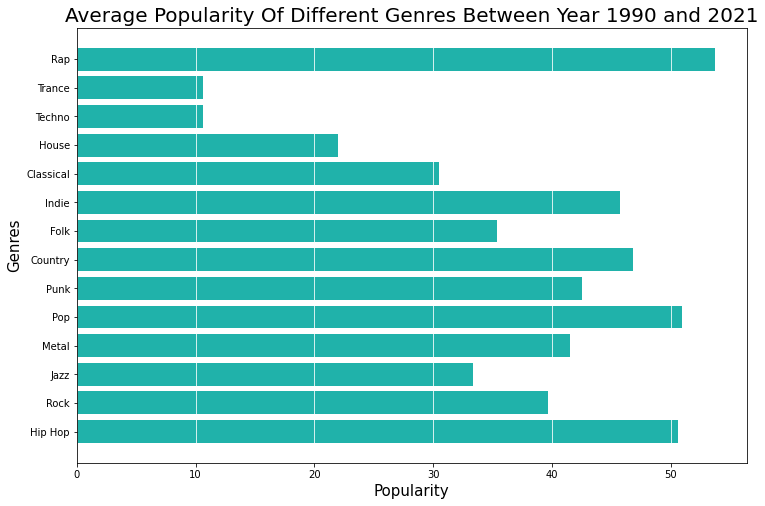

In [ ]:

list4 = []
list4.append(hiphop_popularity)
list4.append(rock_popularity)
list4.append(jazz_popularity)
list4.append(metal_popularity)
list4.append(pop_popularity)
list4.append(punk_popularity)
list4.append(country_popularity)
list4.append(folk_popularity)
list4.append(indie_popularity)
list4.append(classical_popularity)
list4.append(house_popularity)
list4.append(techno_popularity)
list4.append(trance_popularity)
list4.append(rap_popularity)

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list4, height = 0.8,color="lightseagreen")
ax.set_title("Average Popularity Of Different Genres Between Year 1990 and 2021", size = 20)
ax.set_ylabel("Genres", size = 15)
ax.set_xlabel("Popularity", size = 15)
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()

<font color = "indigo">
Looking at this graph we can comment that popularities of Trance and Techno are significantly low between the years 1990 and 2020. On the other hand, rap is the most popular genre, followed by Pop and Hip Hop.
</font>

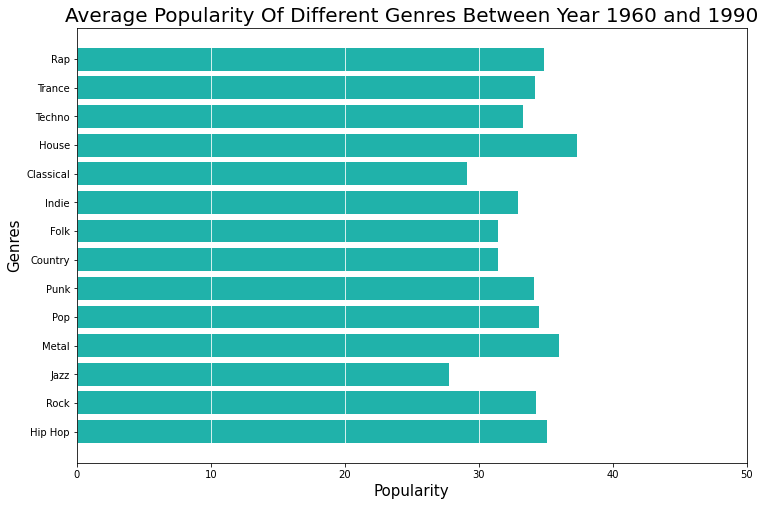

In [ ]:

list4 = []
list4.append(hiphop_popularity)
list4.append(rock_popularity)
list4.append(jazz_popularity)
list4.append(metal_popularity)
list4.append(pop_popularity)
list4.append(punk_popularity)
list4.append(country_popularity)
list4.append(folk_popularity)
list4.append(indie_popularity)
list4.append(classical_popularity)
list4.append(house_popularity)
list4.append(techno_popularity)
list4.append(trance_popularity)
list4.append(rap_popularity)

fig, ax = plt.subplots(figsize = (12,8))
ax.barh(list1, list4, height = 0.8,color="lightseagreen")
ax.set_title("Average Popularity Of Different Genres Between Year 1960 and 1990", size = 20)
ax.set_ylabel("Genres", size = 15)
ax.set_xlabel("Popularity", size = 15)
plt.xticks([0, 10, 20, 30, 40, 50])
axes = plt.gca()
axes.xaxis.grid(color="white")
plt.show()


<font color = "indigo">
This graph shows the popularities of genres between the years 1960 and 1990. Comparing this graph with the 1990-2021's graph. We can see a significant change in the Trance and Techno and Rap's popularities. While the most popular genre in 1990 and 2021 was Rap, whereas in this graph, most popular genre is House.
</font>

## <font color = "mediumseagreen">**Hypothesis Testing**</font>

---
<font color = "indigo">
In this part of the project, we conducted 2 hypothesis tests to check the significant difference of energy and instrumentalness between different eras, between years of 1960-1970 and 2000-2010. Furthermore we also constructed 4 hypothesis and run statistical tests to check if the features like speechiness, tempo, valence and liveness contribute to the popularity of songs.

</font>


###<font color = "crimson">*Instrumentalness of Classical Music in 1960s and 2000s*</font>

<font color = "indigo">
Hypothesis Test: We want to test whether there is significant differences in instrumentality exist between different eras of classical music in 1960s and 2000s.
</font>

**Null Hypothesis ($H_0$)**: Means of `instrumentality` of `classical` samples in 1960 and 2000s are same (e.g. $i_1$ denotes the mean of instrumentality of classical samples in 1960s and $i_2$ denotes the mean of instrumentality of classical samples in 2000s)

$ H_0: \mu_{i_1} = \mu_{i_2}$


**Alternative Hypothesis ($H_A$)**:  Means of `instrumentality` of `classical` samples in 1960 and 2000s are different.


$ H_A:$ Means $\mu_{i_1}, \mu_{i_2}$ are not same.


**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


<font color = "indigo">
We checked if we have missing values in the merged dataset and found out that we don't have significant missing values so we don't have to deal with them. Assuming distributions are close to normal we applied hypotehsis testing directly.
</font>


In [ ]:
genre1 = df_w_genres[["artists", "genres"]]
df_main['artists'] = df_main['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df_main_p = df_main
df_main_p = df_main_p.explode("artists")
merged = pd.merge(df_main_p, genre1, on="artists")
merged.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
genres              0
dtype: int64

<font color = "indigo">
In order to form our sample datasets we first split our data with respect to song years sixties and millenial. Secondly we inserted a new column to our merged dataset named 'Mycol' with a default value 0 and selected the genre as classical then marked these songs with a value 1 and created our sample out of these songs.

In [ ]:
sixties = merged[merged["year"] >= 1960]
sixties = sixties[sixties["year"] < 1970]
millenial = merged[merged["year"] >= 2000]
millenial = millenial[millenial["year"] < 2010]
sixties['Mycol'] = 0
millenial['Mycol'] = 0
pattern = r"[a-zA-Z0-9]+"
word_list = {}
#data.iloc[[0,1,3,6],[0]] = 100
for i in range(len(sixties)):
  words = re.findall(pattern, sixties.iloc[i].genres)
  for word in words:
    if word == 'classical':
      sixties.iloc[[i],[20]] = 1
      break

for i in range(len(millenial)):
  words = re.findall(pattern, sixties.iloc[i].genres)
  for word in words:
    if word == 'classical':
      millenial.iloc[[i],[20]] = 1
      break
sixties.head(20)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres,Mycol
2408,0.984,Maurice Chevalier,0.6310,179537,0.16800,0,3flK3Bmg1bJKyVlbvoQCUr,0.000000,5,0.0621,-15.199,1,Toi et moi,18,1965-09-20,0.0572,77.738,0.7340,1965,"['cabaret', 'vintage hollywood']",0
2722,0.976,Sergei Rachmaninoff,0.2330,902880,0.16800,0,5uVTvL2iGw42HhdM2R8Nhk,0.900000,10,0.1050,-21.091,1,"Piano Concerto No. 3 in D Minor, Op. 30: I. Al...",38,1966-05-01,0.0341,69.013,0.0635,1966,"['classical', 'post-romantic era', 'russian ro...",1
2723,0.973,Sergei Rachmaninoff,0.1380,625680,0.09670,0,49ow4D5a5BuIn5bZ2tggip,0.919000,4,0.0605,-22.356,1,"Piano Concerto No. 2 in C Minor, Op. 18: II. A...",40,1966-05-01,0.0386,65.605,0.0384,1966,"['classical', 'post-romantic era', 'russian ro...",1
2740,0.992,Sergei Rachmaninoff,0.2520,176587,0.02920,0,3WLqGgeJPPGSM2ZvOznDSr,0.914000,4,0.0711,-25.987,1,"Prelude in G-Sharp Minor, Op. 32",25,1963,0.0438,125.572,0.0598,1963,"['classical', 'post-romantic era', 'russian ro...",1
2756,0.979,Sergei Rachmaninoff,0.2800,616640,0.15800,0,1rvfiQyXZ477hqPLKpcxRZ,0.854000,0,0.0460,-17.174,0,"Piano Concerto No. 2 in C Minor, Op. 18: I. Mo...",18,1962,0.0325,104.355,0.0979,1962,"['classical', 'post-romantic era', 'russian ro...",1
2774,0.984,Sergei Rachmaninoff,0.2240,713227,0.07160,0,32kytfYC1LeMWCvovPDWqy,0.931000,4,0.0848,-23.050,1,"Piano Concerto No. 2 in C Minor, Op. 18: II. A...",16,1962,0.0383,81.120,0.0432,1962,"['classical', 'post-romantic era', 'russian ro...",1
2775,0.954,Sergei Rachmaninoff,0.1640,561960,0.22700,0,50YW5s4ZsaZrzN12E6CUAj,0.906000,0,0.0615,-16.155,0,"Piano Concerto No. 2 in C Minor, Op. 18: I. Mo...",30,1966-05-01,0.0328,58.568,0.0970,1966,"['classical', 'post-romantic era', 'russian ro...",1
2795,0.973,Sergei Rachmaninoff,0.3560,662493,0.19700,0,329S6DnMgBO2Vqyc67J5pa,0.891000,0,0.0650,-17.354,0,"Piano Concerto No. 2 in C Minor, Op. 18: III. ...",14,1962,0.0318,146.650,0.0960,1962,"['classical', 'post-romantic era', 'russian ro...",1
2796,0.947,Sergei Rachmaninoff,0.3370,709560,0.31300,0,1ayVfSGKLGZxhW8UBew52g,0.908000,10,0.0662,-16.390,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",27,1966-05-01,0.0323,104.793,0.1100,1966,"['classical', 'post-romantic era', 'russian ro...",1
2844,0.941,Sergei Rachmaninoff,0.1050,382800,0.08450,0,1Jy0fSgu6IqW3B8yQLRXqL,0.880000,4,0.0653,-24.073,0,"Vocalise, Op. 34, No. 14",21,1960,0.0371,90.828,0.0387,1960,"['classical', 'post-romantic era', 'russian ro...",1


<font color = "indigo">
Before applying an appropriate test, we can also visualize these samples to observe the possible statistical difference.

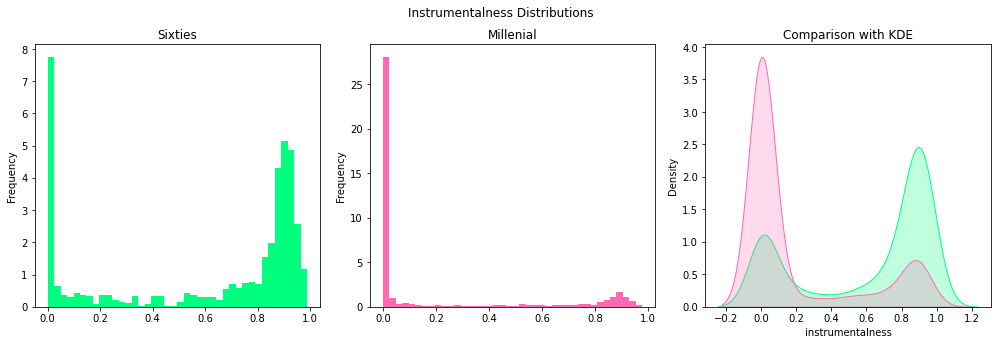

sixties mean =  0.6119208306738804
millenial's mean =  0.19142064355418326


In [ ]:
sixties = sixties[sixties['Mycol'] == 1]
millenial = millenial[millenial['Mycol'] == 1]

fig, ax = plt.subplots(1, 3, figsize=(14,5))

sixties['instrumentalness'].plot(kind="hist", ax=ax[0], bins=40, label="completed", color="springgreen", density=True)
ax[0].set_title("Sixties")

millenial['instrumentalness'].plot(kind="hist", ax=ax[1], bins=40, label="none", color="hotpink", density=True)
ax[1].set_title("Millenial")

sns.kdeplot(sixties['instrumentalness'], shade=True, label="Sixties", ax=ax[2], color="springgreen")
sns.kdeplot(millenial['instrumentalness'], shade=True, label="Millenial", ax=ax[2], color="hotpink")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Instrumentalness Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
x=sixties["instrumentalness"].mean(axis = 0)
print("sixties mean = ",x)
y=millenial["instrumentalness"].mean(axis = 0)
print("millenial's mean = ",y)


<font color = "indigo">Since we are comparing means of 2 different samples, we planned to use t-test and applied ttest_ind function of scipy.stats above to find the p value

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(sixties['instrumentalness'], millenial['instrumentalness'],equal_var=False)

Ttest_indResult(statistic=36.49823848967727, pvalue=2.1524658858248176e-250)

**Interpreting results:**
<font color = "indigo">
> <font color = "indigo"> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of `instrumentality` of `classical` samples in 1960s and 2000s are not the same. Therefore, we reject the null hypothesis and conclude that means of `instrumentality` of `classical` samples in 1960 and 2000s are quite different as observed, 60s classical songs have significantly higher instrumentalities than 2000s.

###<font color = "crimson">*Energy of Classical Music in 1960s and 2000s*</font>

<font color = "indigo">
Hypothesis Test: We want to test whether there is significant differences in energy of the songs between different eras of classical music in 1960s and 2000s. We used the same sample that we creasted of classical songs as mentioned above for our test.
</font>

**Null Hypothesis ($H_0$)**: Means of energy of `classical` samples in 1960 and 2000s are same (e.g. $e_1$ denotes the mean of `energy` of classical samples in 1960s and $e_2$ denotes the mean of `energy` of classical samples in 2000s)

$ H_0: \mu_{e_1} = \mu_{e_2}$


**Alternative Hypothesis ($H_A$)**:  Means of `energy` of `classical` samples in 1960 and 2000s are different.


$ H_A:$ Means $\mu_{e_1}, \mu_{e_2}$ are not same.


**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


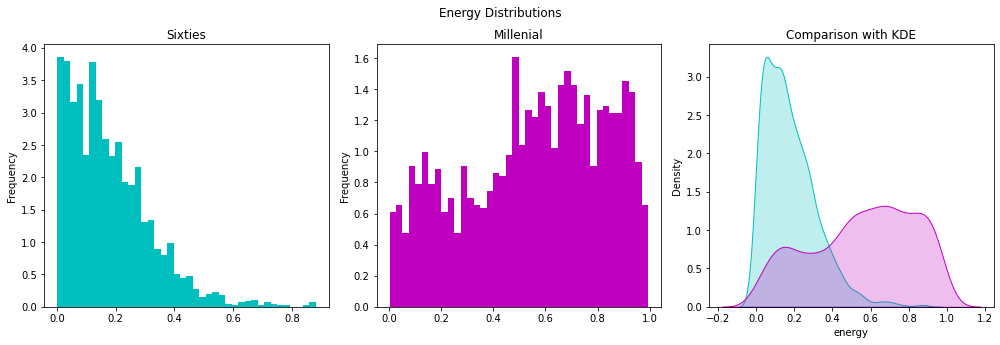

sixties mean =  0.1776448755533697
millenial's mean =  0.5556283660864675


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,5))

sixties['energy'].plot(kind="hist", ax=ax[0], bins=40, label="completed", color="c", density=True)
ax[0].set_title("Sixties")

millenial['energy'].plot(kind="hist", ax=ax[1], bins=40, label="none", color="m", density=True)
ax[1].set_title("Millenial")

sns.kdeplot(sixties['energy'], shade=True, label="Sixties", ax=ax[2], color="c")
sns.kdeplot(millenial['energy'], shade=True, label="Millenial: 1", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Energy Distributions")
# To avoid subtitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
a=sixties["energy"].mean(axis = 0)
print("sixties mean = ",a)
b=millenial["energy"].mean(axis = 0)
print("millenial's mean = ",b)



<font color = "indigo">Since we are comparing means of 2 different samples, we planned to use t-test again and applied ttest_ind function of scipy.stats above to find the p value

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(sixties['energy'], millenial['energy'],equal_var=False)

Ttest_indResult(statistic=-53.29477945378767, pvalue=0.0)

**Interpreting results:**

> <font color = "indigo"> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of `energy` of `classical` samples in 1960s and 2000s are not the same. Therefore, we reject the null hypothesis and conclude that means of `energy` of `classical` samples in 1960 and 2000s are quite different as observed, 2000s classical songs have significantly higher energy than 60s.

###<font color = "crimson">*Speechines in Different Levels of Popularity )*</font>

<font color = "indigo">
Hypothesis Test: We want to test whether there is significant differences in speechiness exist between different levels of popularity. To be able to do this, we split the dataset into 3 samples with 0-33 as low popularity, 33-66 to average popularity and 66-100 to high popularity.
</font>

**Null Hypothesis ($H_0$)**: Means of speechiness in 3 popularity levels are same (e.g. $s_1$ denotes the mean of `speechiness` of low popularity and $s_2$ denotes the mean of `speechiness` of medium popularity and $s_3$ denotes the mean of `speechiness` of high popularity songs.  )

$ H_0: \mu_{s_1} = \mu_{s_2} = \mu_{s_3}$


**Alternative Hypothesis ($H_A$)**:  Means of `speechiness` of popularity leve samples are different.


$ H_A:$ Means $\mu_{s_1}, \mu_{s_2}, \mu_{s_3}$ are not same.


**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


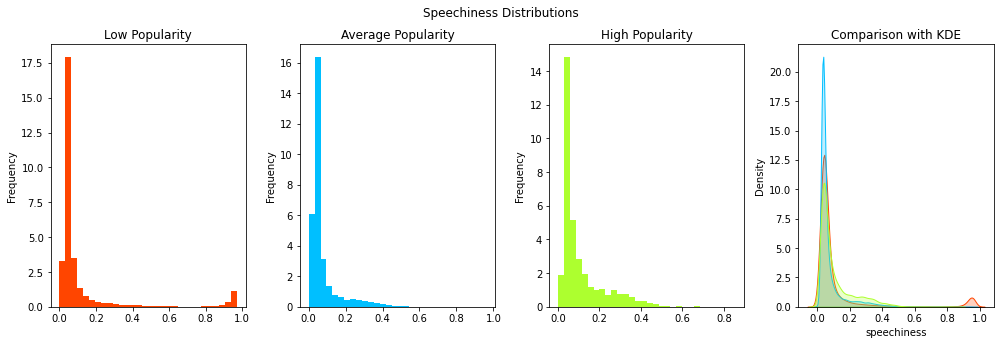

low popularity mean =  0.04921544515494347
average popularity mean =  0.08264385176866935
high popularity mean =  0.04921544515494347


In [ ]:
less_popular = merged[merged["popularity"] >= 0]
less_popular = less_popular[less_popular["popularity"] < 33]
mod_popular = merged[merged["popularity"] >= 33]
mod_popular = mod_popular[mod_popular["popularity"] < 66]
more_popular = merged[merged["popularity"] >= 66]
more_popular = more_popular[more_popular["popularity"] < 100]


fig, ax = plt.subplots(1, 4, figsize=(14,5))

less_popular['speechiness'].plot(kind="hist", ax=ax[0], bins=30, label="completed", color="orangered", density=True)
ax[0].set_title("Low Popularity")

mod_popular['speechiness'].plot(kind="hist", ax=ax[1], bins=30, label="none", color="deepskyblue", density=True)
ax[1].set_title("Average Popularity")

more_popular['speechiness'].plot(kind="hist", ax=ax[2], bins=30, label="none", color="greenyellow", density=True)
ax[2].set_title("High Popularity")

sns.kdeplot(less_popular['speechiness'], shade=True, ax=ax[3], color="orangered")
sns.kdeplot(mod_popular['speechiness'], shade=True, ax=ax[3], color="deepskyblue")
sns.kdeplot(more_popular['speechiness'], shade=True, ax=ax[3], color="greenyellow")
ax[3].set_title("Comparison with KDE")

plt.suptitle("Speechiness Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
a=sixties["speechiness"].mean(axis = 0)
print("low popularity mean = ",a)
b=millenial["speechiness"].mean(axis = 0)
print("average popularity mean = ",b)
c=sixties["speechiness"].mean(axis = 0)
print("high popularity mean = ",c)

Since we want to test 3 samples simultaneously, ANOVA is a test that we can apply here. Below, we introduce our samples to ANOVA test.

In [ ]:
f_stats, p_values = f_oneway(less_popular['speechiness'].values, mod_popular['speechiness'].values, more_popular['speechiness'].values )
p_values

0.0

**Interpreting results:**

> <font color = "indigo"> As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that means of `speechiness` of 3 different popularity levels are not the same. Therefore, we reject the null hypothesis and conclude that means of `speechiness` of 3 different popularity levels are different as observed, noting that songs with low popularity and high popularity doesn't have significant difference whereas songs with average popularity have higher speechiness.

###<font color = "crimson">*Tempo in Different Levels of Popularity )*</font>

<font color = "indigo">
Hypothesis Test: We want to test whether there is significant differences in tempo exist between different levels of popularity. To be able to do this, we again split the dataset into 3 samples with 0-33 as low popularity, 33-66 to average popularity and 66-100 to high popularity.
</font>

**Null Hypothesis ($H_0$)**: Means of tempo in 3 popularity levels are same (e.g. $t_1$ denotes the mean of `tempo` of low popularity and $t_2$ denotes the mean of `tempo` of medium popularity and $t_3$ denotes the mean of `tempo` of high popularity songs.)

$ H_0: \mu_{t_1} = \mu_{t_2} = \mu_{t_3}$


**Alternative Hypothesis ($H_A$)**:  Means of `tempo` of popularity level samples are different.


$ H_A:$ Means $\mu_{t_1}, \mu_{t_2}, \mu_{t_3}$ are not same.


**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


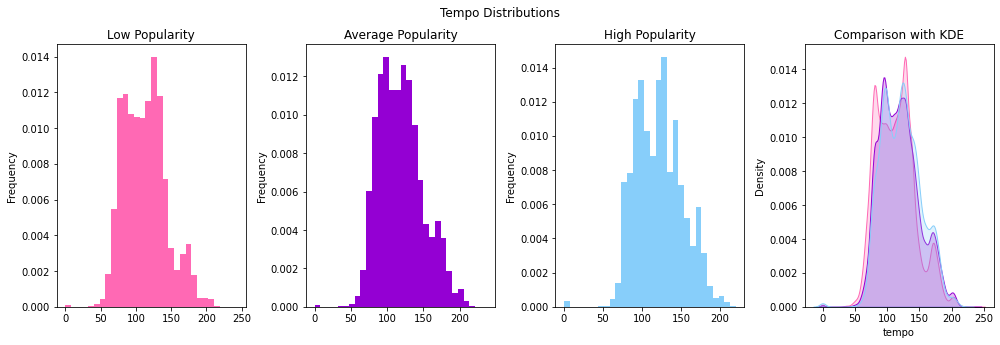

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(14,5))

less_popular['tempo'].plot(kind="hist", ax=ax[0], bins=30, label="completed", color="hotpink", density=True)
ax[0].set_title("Low Popularity")

mod_popular['tempo'].plot(kind="hist", ax=ax[1], bins=30, label="none", color="darkviolet", density=True)
ax[1].set_title("Average Popularity")

more_popular['tempo'].plot(kind="hist", ax=ax[2], bins=30, label="none", color="lightskyblue", density=True)
ax[2].set_title("High Popularity")

sns.kdeplot(less_popular['tempo'], shade=True, ax=ax[3], color="hotpink")
sns.kdeplot(mod_popular['tempo'], shade=True, ax=ax[3], color="darkviolet")
sns.kdeplot(more_popular['tempo'], shade=True, ax=ax[3], color="lightskyblue")
ax[3].set_title("Comparison with KDE")

plt.suptitle("Tempo Distributions")
# To avoid suptitle and titles of ax titles colliding
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<font color="indigo">Since we want to test 3 samples simultaneously, ANOVA can be again applied here. Below, we introduce our samples to ANOVA test.

In [ ]:
f_stats, p_values = f_oneway(less_popular['tempo'].values, mod_popular['tempo'].values, more_popular['tempo'].values)
p_values

4.0130386819315005e-88

**Interpreting results:**

> <font color = "indigo"> P-value we obtained is smaller than the threshold significance level 0.05. Therefore, we reject the null hypothesis and conclude that means of `tempo` of 3 different popularity levels are different as observed.

###<font color = "crimson">*Liveness in Different Levels of Popularity )*</font>

<font color = "indigo">
Hypothesis Test: We want to test whether there is significant differences in different categories of liveness levels exist between different categories of popularity levels. To be able to do this, we again split the dataset into 3 samples with 0-33 as low popularity, 33-66 to average popularity and 66-100 to high popularity. We can us Chi Square test.
</font>

**Null Hypothesis ($H_0$)**: No relationship exists on the categorical variables with respect to popularities and liveness in the dataset; they are independent.


**Alternative Hypothesis ($H_A$)**:  Relationship exists on the categorical variables with respect to popularities and liveness in the dataset; they are dependent.



**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.


In [ ]:
df_c = merged.copy()
# Categorizing some of the attributes
def categorize_popularity(pop):
  if pop < 33:
    return 'not popular'
  elif 33 <= pop < 66:
    return 'average popularity'
  else:
    return 'popular'

def categorize_liveness(val):
  if val <0.3 :
    return 'low liveness'
  elif 0.3<= val< 0.6:
    return 'average liveness'
  else:
    return 'high liveness'

<font color = "indigo"> We categorized the data according to their popularities and loudness levels and labeled them accordingly in new columns.

In [ ]:
df_c['popularity_rate'] = df_c['popularity'].apply(categorize_popularity)
df_c['liveness_category'] = df_c['liveness'].apply(categorize_liveness)
df_c.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres,popularity_rate,liveness_category
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,"['harlem renaissance', 'traditional blues']",not popular,average liveness
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,"['harlem renaissance', 'traditional blues']",not popular,average liveness
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,"['harlem renaissance', 'traditional blues']",not popular,low liveness
3,0.995,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.461,1920,"['harlem renaissance', 'traditional blues']",not popular,average liveness
4,0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.764,1920,"['harlem renaissance', 'traditional blues']",not popular,low liveness


<font color = "indigo">We can calculate the crosstab by using the `crosstab` function of Pandas.

In [ ]:
crosstab = pd.crosstab(df_c["popularity_rate"], df_c["liveness_category"])
crosstab

liveness_category,average liveness,high liveness,low liveness
popularity_rate,,,
average popularity,10135,2965,55427
not popular,23790,10157,107202
popular,1170,260,7597


In [ ]:
from scipy.stats import chi2_contingency
chi2_test_stat, p_value, dof, expected_freqs = chi2_contingency(crosstab)
p_value

2.3131404111484497e-248

**Interpreting results:**

>
<font color = "indigo">
As p-value we obtained is smaller than the threshold significance level 0.05, we can conclude that relationship exists on the categorical variables with respect to popularities and liveness in the dataset, they are dependent. Therefore, we reject the null hypothesis. Noting that songs with average liveness are significantly higher among the not popular ones for instance, they are not independent.

## <font color = "mediumseagreen">**Machine Learning**</font>

---
<font color="indigo">In the continuation of our project, we tried to predict song popularities with various machine learning models and also create a simple song recommendation system.
  
  <font color = "indigo">We have implemented machine learning algorithms which include multiple linear regression, KNN regression and random forest regression for popularity predictions. Multiple linear regression is a parametric model which uses the dataset to calculate regression parameters that are applied to the features in order to predict the target variable, KNN regression is an interpolation model that uses k-neighbors to predict the target variable. Lastly, Random Forest is a supervised machine learning algorithm which can be used for both classification and regression problems and provides the advantage of knowing feature importance.

<font color = "indigo"> Before implementing our machine learning algorithms, we first preprocessed our data. We normalized numeric values and encoded the genres of the spotify songs method in order to represent genres numerically so that we would be able to use our machine learning models.

###<font color = "crimson">*Multi-linear regression*</font>

- <font color = "indigo">As our first model, we used multi-linear regression.

In [ ]:
genre1 = df_w_genres[["artists", "genres"]]
df_main['artists'] = df_main['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df_main_p = df_main
df_main_p = df_main_p.explode("artists")
merged = pd.merge(df_main_p, genre1, on="artists")

In [ ]:
rock = [1 if "rock" in item else 0 for item in merged["genres"].values]
jazz = [1 if "jazz" in item  else 0 for item in merged["genres"].values]
metal =[1 if "metal" in item else 0 for item in merged["genres"].values]
pop = [1 if "pop" in item  else 0 for item in merged["genres"].values]
punk = [1 if "punk" in item else 0 for item in merged["genres"].values ]
country = [1 if "country" in item else 0 for item in merged["genres"].values ]
folk = [1 if "folk" in item else 0 for item in merged["genres"].values ]
classical = [1 if "classical" in item  else 0 for item in merged["genres"].values ]
house = [1 if "house" in item else 0 for item in merged["genres"].values ]
techno = [1 if "techno" in item else 0 for item in merged["genres"].values ]
trance = [1 if "trance" in item  else 0 for item in merged["genres"].values]
hiphop = [1 if "hip" in item or "hop" in item else 0 for item in merged["genres"].values ]
rap =  [1 if "rap" in item else 0 for item in merged["genres"].values ]

In [ ]:
merged["rock"] = rock
merged["jazz"] = jazz
merged["metal"] = metal
merged["pop"] = pop
merged["punk"] = punk
merged["country"] = country
merged["rap"] = rap
merged["folk"] = folk
merged["classical"] = classical
merged["house"] = house
merged["techno"] = techno
merged["trance"] = trance
merged["hiphop"] = hiphop

In [ ]:
merged.head(10000)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres,rock,jazz,metal,pop,punk,country,rap,folk,classical,house,techno,trance,hiphop
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.995,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.461,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.764,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.940,Frank Sinatra,0.187,268333,0.1250,0,0ycoGsyVxT7ekdsUBhd21e,0.000816,3,0.227,-18.250,0,You Go To My Head - Remastered,26,1960-07,0.0332,82.869,0.187,1960,"['adult standards', 'easy listening', 'lounge']",0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0.639,Frank Sinatra,0.662,245693,0.1530,0,7udrxkpUGUGf1wTHWHpIOy,0.000000,8,0.108,-16.436,1,That Old Black Magic - Remastered,40,1961-07,0.0514,127.217,0.409,1961,"['adult standards', 'easy listening', 'lounge']",0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0.532,Frank Sinatra,0.616,144227,0.2460,0,3rPiLretymzYzhBa22NCdq,0.000001,7,0.281,-13.345,1,It's A Wonderful World,35,1961-07,0.0367,121.683,0.617,1961,"['adult standards', 'easy listening', 'lounge']",0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0.701,Frank Sinatra,0.507,122333,0.2890,0,0LUI1xxo3PQ1nJFNKU0oRq,0.000000,8,0.103,-11.668,1,Almost Like Being In Love - Remastered,28,1961-07,0.0488,170.966,0.854,1961,"['adult standards', 'easy listening', 'lounge']",0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# creating the vectorizer
vectorizer = CountVectorizer()
# extracting input and output
X = vectorizer.fit_transform(merged["artists"])
df2 = pd.DataFrame.sparse.from_spmatrix(X)
merged = pd.concat([merged, df2.reindex(merged.index)], axis=1)

merged

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres,rock,jazz,metal,pop,punk,country,rap,folk,classical,house,techno,trance,hiphop,0,1,2,3,4,5,6,...,26626,26627,26628,26629,26630,26631,26632,26633,26634,26635,26636,26637,26638,26639,26640,26641,26642,26643,26644,26645,26646,26647,26648,26649,26650,26651,26652,26653,26654,26655,26656,26657,26658,26659,26660,26661,26662,26663,26664,26665
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.1760,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.4870,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.995,Mamie Smith,0.482,198000,0.2290,0,0lqEx4vktZP1y9hnwfF27Y,0.000061,7,0.5490,-12.619,1,Kansas City Man Blues - 78rpm Version,4,1920,0.0812,77.232,0.4610,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.992,Mamie Smith,0.574,189800,0.1380,0,4HYmmG8uHL2hP4zSFWavKF,0.000492,3,0.2330,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,1920,0.1090,158.422,0.7640,1920,"['harlem renaissance', 'traditional blues']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218698,0.966,Johannes Bornlöf,0.269,424200,0.0926,0,1Svqb7CX6rQvJpZY3iVBXh,0.890000,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,"['background music', 'calming instrumental', '...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218699,0.995,Johannes Bornlöf,0.297,349200,0.0287,0,2LeqqwzobL5ktfQhWA3bHh,0.908000,8,0.0995,-30.008,1,Nuvole bianche,0,2021-01-23,0.0564,141.636,0.0678,2021,"['background music', 'calming instrumental', '...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218700,0.995,Johannes Bornlöf,0.343,206700,0.0165,0,3Glmyv3hbGGTgeR3FZrxJA,0.878000,9,0.0774,-30.915,0,Una Mattina,0,2021-01-23,0.0455,126.970,0.1510,2021,"['background music', 'calming instrumental', '...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
218701,0.966,Johannes Bornlöf,0.269,424200,0.0926,0,4yBReaKJW78ZYCHpc1cfaK,0.890000,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,"['background music', 'calming instrumental', '...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cols = ["artists","genres", "id", "name","year","release_date"]
merged = merged.drop(cols, axis = 1)

<font color = "indigo"> We normalized (standardized) the data to set all numeric values in each column to a common scale so that the difference between values are not distorted.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(merged)
scaled_features = scaler.transform(merged)
merged = pd.DataFrame(scaled_features, columns = merged.columns[:])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from os.path import join

In [ ]:
features = []
counter = 0
for column in merged.columns:
  if column != 'popularity':
    features.append(column),
print(features)

['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence', 'rock', 'jazz', 'metal', 'pop', 'punk', 'country', 'rap', 'folk', 'classical', 'house', 'techno', 'trance', 'hiphop']


<font color = "indigo"> We kept the columns, except the popularity, in a list called features. We converted columns into column vectors. With the help of a multi-linear regression model, we fitted train values; and then we obtained coefficient values.

In [ ]:
merged = merged.loc[:,~merged.columns.duplicated()]

In [ ]:
X = merged[features].values
y = merged['popularity'].values
# train-test split
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.40, random_state=10)
# creating the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# let's have a look at the coefficients,
# i.e m values
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
coeff_df[:10]

,Coefficient
acousticness,-0.240867
danceability,0.023440
duration_ms,-0.010196
energy,0.042494
explicit,0.103686
instrumentalness,-0.154246
key,-0.000825
liveness,-0.063466
loudness,-0.032344
mode,0.010414


<font color = "indigo"> While coefficient of explicit, energy ,mode,key and danceability are positive, it is negative for acousticness, duration, instrumentalness, liveness and loudness. As the coefficient value increases, it makes the popularity score higher therefore explicitness, energy ,mode and danceability of songs are important determinants of high popularity among the dataset .

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Multi-Linear Regression Errors")
print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

Multi-Linear Regression Errors
mse: 0.5626338813162332
mae: 0.5971097702469763
rmse: 0.7500892489005779


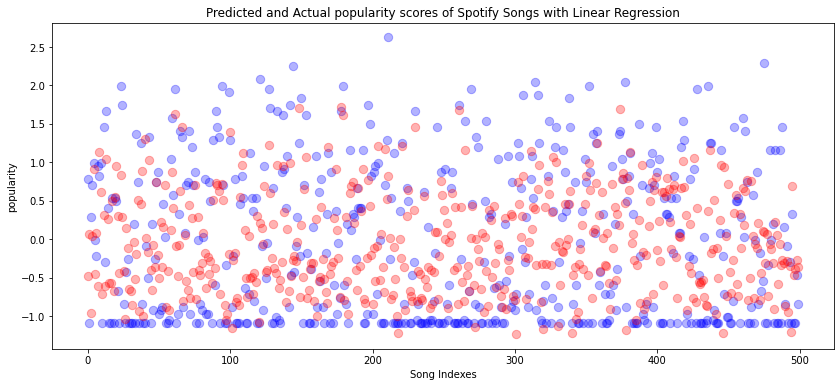

In [ ]:
_, ax = plt.subplots(figsize = (14,6))

ax.scatter(x = range(0, 500), y=y_test[:500], c = 'blue', label = 'Actual',alpha = 0.3,  s = 70)
ax.scatter(x = range(0, 500), y=y_pred[:500], c = 'red', label = 'Predicted', alpha = 0.3, s= 70)

ax.set_xlabel("Song Indexes")
ax.set_ylabel("popularity")
ax.set_title("Predicted and Actual popularity scores of Spotify Songs with Multi-Linear Regression")
plt.show()

<font color = "indigo"> We can see the difference between predicted and actual popularity scores by Multiple Lienar Regression. In order to have a clear graph we chose to visualise the first 500 songs in the dataset.

###<font color = "crimson">*KNN regression*</font>

- <font color = "indigo">As our second machine learning model we used KNN regression in order to predict popularity scores. In our model, we tried 2 different knn values : 5 and 9. We tested both of their errors with validation data and use the k value which gives smaller error. Lastly, we calculated the error with the test data.

In [ ]:
knn = KNeighborsRegressor(5)
knn.fit(X_train, y_train)

y_predval = knn.predict(X_val)

mse = mean_squared_error(y_val, y_predval)
mae = mean_absolute_error(y_val, y_predval)
rmse = np.sqrt(mse)
print("5-NN Regression Errors")
print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

5-NN Regression Errors
mse: 0.44917102138762915
mae: 0.46717265508944633
rmse: 0.6702022242484944


In [ ]:
knn = KNeighborsRegressor(9)
knn.fit(X_train, y_train)


y_predval = knn.predict(X_val)


mse = mean_squared_error(y_val, y_predval)
mae = mean_absolute_error(y_val, y_predval)
rmse = np.sqrt(mse)
print("5-NN Regression Errors")
print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

5-NN Regression Errors
mse: 0.4398794090899132
mae: 0.4766864874310572
rmse: 0.6632340530234505


<font color = "indigo"> As it can be seen, errors in model with k = 9 is smaller than errors in model with k = 5. Therefore, we will finalise the value of k as 9.

In [ ]:
knn = KNeighborsRegressor(5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))


mse: 0.4512287820281057
mae: 0.4683540152363913
rmse: 0.6717356489186097


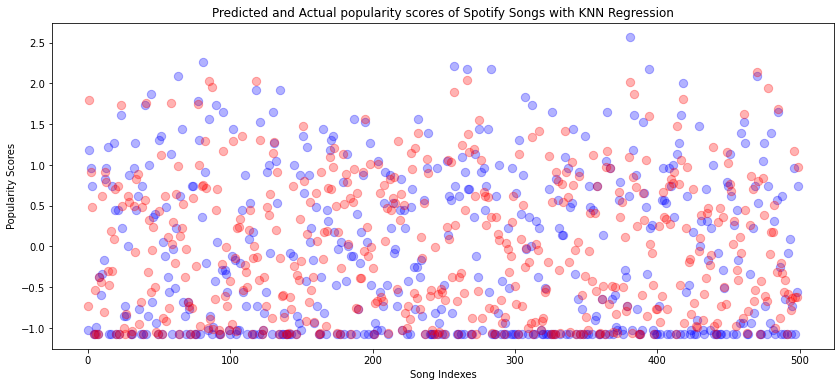

In [ ]:
_, ax = plt.subplots(figsize = (14,6))

ax.scatter(x = range(0, 500), y=y_test[:500], c = 'blue', label = 'Actual',alpha = 0.3,  s = 70)
ax.scatter(x = range(0, 500), y=y_pred[:500], c = 'red', label = 'Predicted', alpha = 0.3, s= 70)

ax.set_xlabel("Song Indexes")
ax.set_ylabel("Popularity Scores")
ax.set_title("Predicted and Actual popularity scores of Spotify Songs with KNN Regression")
plt.show()

<font color = "indigo"> We observed that the error of the KNN model is smaller than the error of the multi-linear regression model. Therefore, we concluded that our KNN  model is better at predicting popularities of Spotify songs according to their features than multi-linear regression. However, due to the fact that error rates are close for each model and values are randomly selected, for further attempts multi-linear regression may show better results.

###<font color = "crimson">*Random Forest*</font>

- <font color = "indigo"> As our third machine learning model, we used random forest with 50 trees in order to predict popularity scores, compared it's accuracy with decision tree and analysed which features contributed to predictions the most.

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=42) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Random Forest Training(In new version default of estimators will be 100)
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#Decision Tree Testing
dt_predictions = model_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_predictions)

rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)

print("Decision Tree Accuracy:"+str(dt_acc))
print("Random Forest Accuracy:"+str(rf_acc))


Decision Tree Accuracy:0.4043971955494589
Random Forest Accuracy:0.46079103795153176


<font color = "indigo">We can see that Random Forest outperforms Decision Tree as expected. However there's not an overfitting and this model is moderately successful to predict popularity scores.

<font color = "indigo"> One of the important questions is what features of the song do contribute most to the moderate success of the Random Forest model. We analyzed this with feature importances which refers to techniques that assign a score to input features based on how useful they are at predicting popularity scores .

In [ ]:
# Get importance list from model
importances = list(model_rf.feature_importances_)

# Create list of tuples by combining(zip) feature list and and importance list
feature_importance = [(features, round(importance, 2)) for features, importance in zip(features, importances)]

# Sort features by importance
feature_importances = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print top 5 features
for pair in feature_importances[:5]:
  print("Variable: {:2}   Importance: {}".format(*pair))

Variable: acousticness   Importance: 0.32
Variable: energy   Importance: 0.14
Variable: rock   Importance: 0.11
Variable: instrumentalness   Importance: 0.09
Variable: loudness   Importance: 0.07


Text(0.5, 1.0, 'Feature Importances')

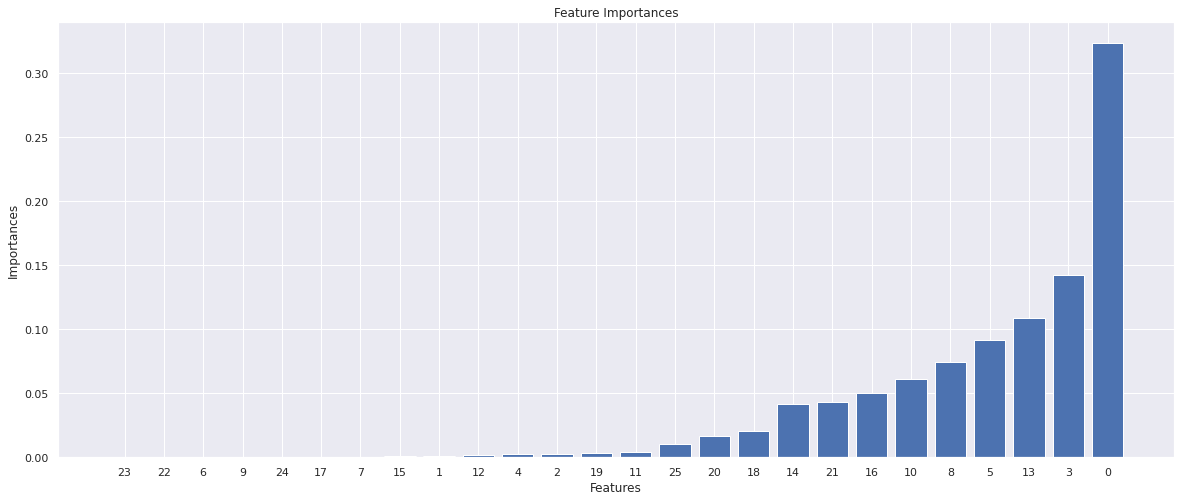

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
index=np.argsort(importances)
arr_sorted=[]
for i in index:
  arr_sorted.append(importances[i])

x=np.arange(0,len(importances))
ax.set_xticks(x)
ax.set_xticklabels(index)
ax.bar(x,arr_sorted)
plt.xlabel("Features")
plt.ylabel("Importances")
plt.title("Feature Importances")

<font color = "indigo"> In this graph, the columns contribution to predictions is visualised. As we can see, acousticness (0th column in our data) plays an important role to predict popularity in random forest model followed by energy(3th column), rock(13th column) as song genre, instrumentalness(5th column) and loudness(8th column).

###<font color = "crimson">*Simple Song Recommendation System*</font>
<font color = "indigo"> In order to design a simple recommendation system, we used kmeans clustering algorithm to cluster the songs in the dataset and then designed a simple class which recommends top 10 songs with the smallest within cluster distance to a given song.

In [ ]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [ ]:
df = pd.DataFrame(spotify_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = df_main.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
df['features'] = features
MinMaxScaler(df['features'])

MinMaxScaler(copy=True,
             feature_range=0         1
1         1
2         1
3         8
4         1
         ..
174384    1
174385    1
174386    6
174387    6
174388    1
Name: features, Length: 174389, dtype: int32)

In [ ]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

recommendations = Spotify_Recommendation(df)
recommendations.recommend("Lovers Rock", 10)

100%|██████████| 174387/174387 [00:15<00:00, 11402.20it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artists,name
103171,['Barão Vermelho'],Bete Balanço
55318,['Shinedown'],Save Me
16385,['O-Zone'],Dragostea Din Tei
11168,['Bob Marley & The Wailers'],Positive Vibration
158441,"[""Olivia O'Brien""]",Love Myself
54226,"['Naughty By Nature', 'Zhané']",Jamboree (feat. Zhané)
85047,['The Outlaws'],Song For You
50644,['The Alan Parsons Project'],Mammagamma - Instrumental
107163,['Britney Spears'],My Prerogative
35098,['Los Askis'],¡Ay! El Amor


<font color = "indigo"> We can see that recommended top 10 songs are quite similar to the given song.

In [ ]:
get_input = input("Write name of the song: ")
recommendations = Spotify_Recommendation(df)
recommendations.recommend(get_input, 10)

Write name of the song: Last Nite


100%|██████████| 174388/174388 [00:13<00:00, 12825.86it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artists,name
35966,['Julieta Venegas'],Andar Conmigo
13251,"['Paul Simon', 'General M.D.Shirinda', 'The Ga...",I Know What I Know (with General M.D.Shirinda ...
171816,['Young Curt'],No Bitch
31962,['Eric Clapton'],I've Got a Rock 'N' Roll Heart
135014,['Cold Chisel'],Choirgirl - 2011 Remastered
9360,['Andy Williams'],Can't Take My Eyes Off You
118659,['Roxy Music'],Flesh And Blood
11287,['Fleetwood Mac'],Don't Stop - 2004 Remaster
53935,['Rob Zombie'],Meet The Creeper
18346,['Carly Rae Jepsen'],Call Me Maybe


### <font color="#E50914"> Conclusion </font>
<font color = "indigo">
- From our overall findings and visualisations of data, we have seen what features makes a popular Spotify song compared to non popular ones, which features are more important in order to predict popularities with various machine learning models and we gained some insight into the song features and their variations over time also variations based on genres and comparisons between time periods such as sixties and millenials as well as relationships and correlations between them with the help of hypothesis testing methods.
At the end, we were able to design a simple song recommendation system thanks to kmeans clustering method which was fun to try and also provided quite accurate results.
